In [34]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [35]:
import torch
import torchvision
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import time
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
import glob
import numpy
import random

from PIL import Image
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torchvision import datasets, models, transforms
from torchsummary import summary

import torchvision.transforms as transforms

In [36]:
classes = [
           "durian",
           "pumpkin",
           "tomato",
           "watermelon"
]

In [37]:
model = torch.load ('/content/gdrive/MyDrive/Colab Notebooks/Fruit_model.pt')

In [38]:
image_transforms = transforms.Compose([
        transforms.Resize(256),
        #transforms.RandomResizedCrop(size=256, scale=(0.8, 1.0)),
        #transforms.RandomRotation(degrees=15),
        #transforms.CenterCrop(size=224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406],
                             [0.229, 0.224, 0.225])
])

In [39]:
def classify (model, image_transform, image_path, classes) :
    model = model.eval()
    image = Image.open (image_path)
    image = image_transforms(image).float()
    image = image.unsqueeze(0)

    output = model(image)
    _,predicted = torch.max(output.data,1)

    print(classes[predicted.item()])

watermelon


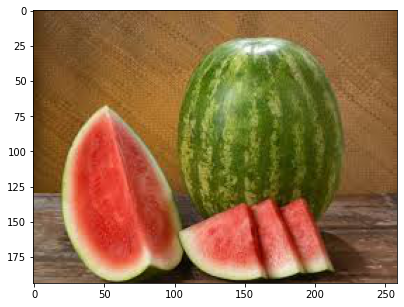


tomato


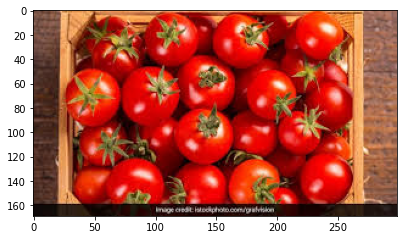


pumpkin


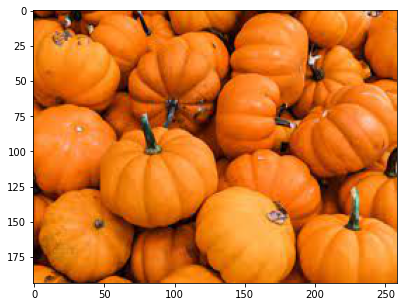


durian


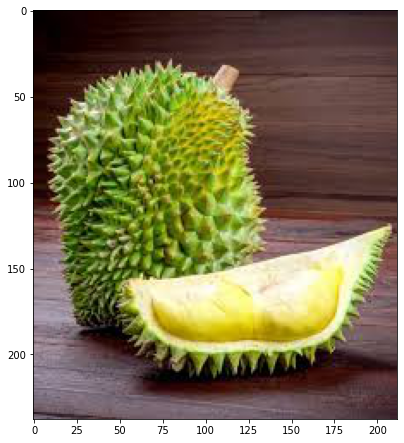

In [55]:
plt.figure(figsize=[30,30])
name = classify(model, image_transforms, '/content/gdrive/MyDrive/Colab Notebooks/Watermelon.jpg', classes)
image1 = Image.open('/content/gdrive/MyDrive/Colab Notebooks/Watermelon.jpg')
plt.subplot(141);plt.imshow(image1);plt.title(name)
plt.show()
print()

plt.figure(figsize=[30,30])
name = classify(model, image_transforms, '/content/gdrive/MyDrive/Colab Notebooks/Tomato.jpg', classes)
image2 = Image.open('/content/gdrive/MyDrive/Colab Notebooks/Tomato.jpg')
plt.subplot(142);plt.imshow(image2);plt.title(name)
plt.show()
print()

plt.figure(figsize=[30,30])
classify(model, image_transforms, '/content/gdrive/MyDrive/Colab Notebooks/Pumpkin.jpg', classes)
image3 = Image.open('/content/gdrive/MyDrive/Colab Notebooks/Pumpkin.jpg')
plt.subplot(142);plt.imshow(image3);plt.title(name)
plt.show()
print()

plt.figure(figsize=[30,30])
classify(model, image_transforms, '/content/gdrive/MyDrive/Colab Notebooks/Durian.jpg', classes)
image4 = Image.open('/content/gdrive/MyDrive/Colab Notebooks/Durian.jpg')
plt.subplot(142);plt.imshow(image4);plt.title(name)
plt.show()


